# C191077

**Importing libraries and Preprocessing**

In [76]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, utils
from tensorflow.keras.utils import to_categorical

# Function to load the dataset
symbol_classes = [#'0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                      #'A' 'b' 'C' 'd' 'e' 'f' 'G' 'H' 'i' 'j' 'k' 'l' 'M' 'N' 'o' 'p' ' 'q' 'R' 'S' 'T' , 'u', 'v', 'w', 'X', 'y', 'z'
                      #'=' 'geq', 'gt', , 'leq' 'lt', 'rightarrow' 'times'
                        'alpha', 'beta', 'Delta', 'div','exists',
                      'forall', 'forward_slash','gamma', 'infty', 'int',
                     #  'lambda','log','mu','neq',
                      #'phi', 'pi','sigma','sqrt', 'sum','tan', 'theta'
                    ]
def load_dataset():
    images = []
    labels = []
    symbol_names = []
    
    # Define the symbol classes
    

    # Loop through the symbol classes
    for i, symbol in enumerate(symbol_classes):
        # Get the path to the symbol images
        #C:\Users\User\NNFS\NNFS_project002_HSymbol\extracted_images
        symbol_path = f'extracted_images/{symbol}'
        
        # Loop through the symbol images
        for filename in os.listdir(symbol_path):
            # Read the image and convert it to grayscale
            image = cv2.imread(os.path.join(symbol_path, filename), cv2.IMREAD_GRAYSCALE)
            
            # Resize the image to a fixed size (e.g., 32x32)
            image = cv2.resize(image, (45,45))
            
            # Normalize the pixel values to be between 0 and 1
            image = image / 255.0
            
            # Add the image and label to the lists
            images.append(image)
            labels.append(i)
            
            # Add the symbol name to the list
            symbol_names.append(symbol)
    
    return np.array(images), np.array(labels), symbol_names

# Load the dataset
images, labels, symbol_names = load_dataset()

# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42)

# Convert the labels to one-hot encoding
#train_labels = to_categorical(train_labels)
#test_labels = to_categorical(test_labels)
#
# Reshape the images to match the input shape of the model
train_images = train_images.reshape((-1, 45,45, 1))
test_images = test_images.reshape((-1, 45,45 ,1))
# Convert the image arrays to float16
train_images = train_images.astype('float16')
test_images = test_images.astype('float16')


**using convolutional and dense layers:**

In [77]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(45, 45, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(symbol_classes), activation='sigmoid'))

model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 43, 43, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 21, 21, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 19, 19, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 9, 9, 64)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 5184)              0         
                                                                 
 dense_18 (Dense)            (None, 64)              

In [19]:
#import numpy as np

# #Calculate the memory usage for each array column
#train_images_memory = np.sum(train_images.nbytes)
#test_images_memory = np.sum(test_images.nbytes)
#train_labels_memory = np.sum(train_labels.nbytes)
#test_labels_memory = np.sum(test_labels.nbytes)

# Print the memory usage for each column
#print("Memory usage for train_images:", train_images_memory / 1e6, "MB")
#print("Memory usage for test_images:", test_images_memory / 1e6, "MB")
#print("Memory usage for train_labels:", train_labels_memory / 1e6, "MB")
#print("Memory usage for test_labels:", test_labels_memory / 1e6, "MB")




Memory usage for train_images: 108.054 MB
Memory usage for test_images: 27.01755 MB
Memory usage for train_labels: 988.33392 MB
Memory usage for test_labels: 247.120524 MB


 **compile and train the model**

In [78]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




In [25]:
#from keras.utils import to_categorical

#train_labels = to_categorical(train_labels, num_classes=10)
#test_labels = to_categorical(test_labels, num_classes=10)


#train_labels = utils.to_categorical(train_labels, num_classes=21)
#test_labels = utils.to_categorical(test_labels, num_classes=21)
#train_labels = utils.to_categorical(train_labels, num_classes=21)
#test_labels = utils.to_categorical(test_labels, num_classes=21)



In [79]:
history = model.fit(train_images, train_labels, epochs=3, 
                    validation_data=(test_images, test_labels))

Epoch 1/3
270/270 [==============================] - 10s 32ms/step - loss: 0.3943 - accuracy: 0.8795 - val_loss: 0.0858 - val_accuracy: 0.9694
Epoch 2/3
270/270 [==============================] - 9s 33ms/step - loss: 0.0613 - accuracy: 0.9796 - val_loss: 0.0574 - val_accuracy: 0.9805
Epoch 3/3
270/270 [==============================] - 8s 31ms/step - loss: 0.0238 - accuracy: 0.9922 - val_loss: 0.0255 - val_accuracy: 0.9875


**evaluate the model's performance:**

In [80]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)


68/68 - 1s - loss: 0.0255 - accuracy: 0.9875 - 663ms/epoch - 10ms/step
Test accuracy: 0.9874709844589233


**Finally, predictions using the trained model:**

In [81]:
predictions = model.predict(test_images)


68/68 [==============================] - 1s 10ms/step


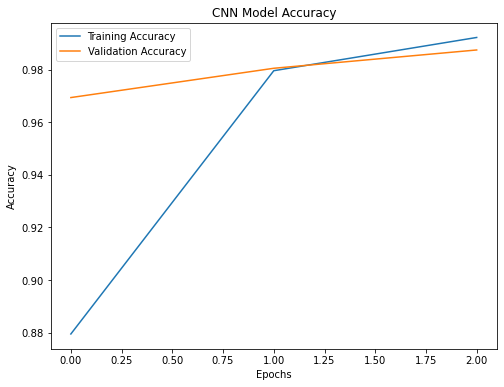

In [82]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



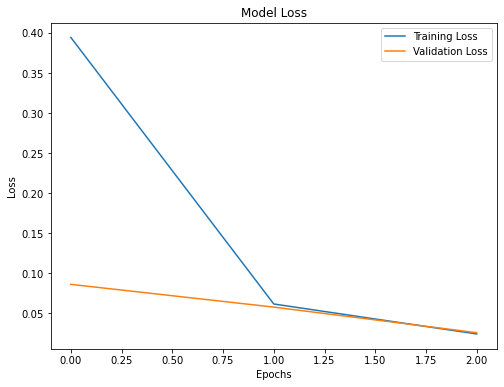

In [83]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

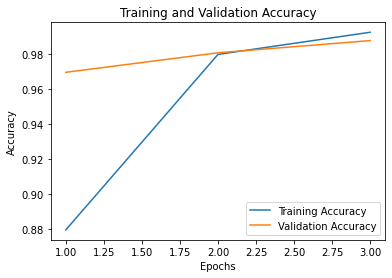

In [84]:
import matplotlib.pyplot as plt

# Plotting test accuracy
epochs = len(history.history['accuracy'])
plt.plot(range(1, epochs+1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, epochs+1), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


#history.history['val_accuracy']
# RNN

In [87]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, utils
from tensorflow.keras.utils import to_categorical

# Function to load the dataset
symbol_classes = [ #'0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                      #'A' 'b' 'C' 'd' 'e' 'f' 'G' 'H' 'i' 'j' 'k' 'l' 'M' 'N' 'o' 'p' ' 'q' 'R' 'S' 'T' , 'u', 'v', 'w', 'X', 'y', 'z'
                      #'=' 'geq', 'gt', , 'leq' 'lt', 'rightarrow' 'times'
                        'alpha', 'beta', 'Delta', 'div','exists',
                      'forall', 'forward_slash','gamma', 'infty', 'int',
                     #  'lambda','log','mu','neq',
                      #'phi', 'pi','sigma','sqrt', 'sum','tan', 'theta 
]
def load_dataset():
    images = []
    labels = []
    symbol_names = []
    
    # Define the symbol classes
    

    # Loop through the symbol classes
    for i, symbol in enumerate(symbol_classes):
        # Get the path to the symbol images
        #C:\Users\User\NNFS\NNFS_project002_HSymbol\extracted_images
        symbol_path = f'extracted_images/{symbol}'
        
        # Loop through the symbol images
        for filename in os.listdir(symbol_path):
            # Read the image and convert it to grayscale
            image = cv2.imread(os.path.join(symbol_path, filename), cv2.IMREAD_GRAYSCALE)
            
            # Resize the image to a fixed size (e.g., 32x32)
            image = cv2.resize(image, (45,45))
            
            # Normalize the pixel values to be between 0 and 1
            image = image / 255.0
            
            # Add the image and label to the lists
            images.append(image)
            labels.append(i)
            
            # Add the symbol name to the list
            symbol_names.append(symbol)
    
    return np.array(images), np.array(labels), symbol_names

# Load the dataset
images, labels, symbol_names = load_dataset()

# Split the dataset into training and testing sets
Rtrain_images, Rtest_images, Rtrain_labels, Rtest_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42)

# Reshape the images to match the input shape of the model
Rtrain_images = Rtrain_images.reshape((-1, 45, 45))
Rtest_images = Rtest_images.reshape((-1, 45, 45))

# Convert the labels to one-hot encoding
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)



In [88]:
# Create the RNN model
model = models.Sequential()
model.add(layers.SimpleRNN(64, input_shape=(45, 45)))
model.add(layers.Dense(len(symbol_classes), activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 64)                7040      
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                                 
Total params: 7,690
Trainable params: 7,690
Non-trainable params: 0
_________________________________________________________________


In [89]:
# Train the model
history = model.fit(Rtrain_images, Rtrain_labels, epochs=3,
                    validation_data=(Rtest_images, Rtest_labels))



Epoch 1/3
270/270 [==============================] - 3s 7ms/step - loss: 1.5294 - accuracy: 0.4333 - val_loss: 1.4470 - val_accuracy: 0.4408
Epoch 2/3
270/270 [==============================] - 1s 5ms/step - loss: 1.1052 - accuracy: 0.6282 - val_loss: 1.1869 - val_accuracy: 0.5471
Epoch 3/3
270/270 [==============================] - 1s 5ms/step - loss: 1.1016 - accuracy: 0.6276 - val_loss: 0.9238 - val_accuracy: 0.7179


In [90]:
# Evaluate the model on the test set
Rtest_loss, Rtest_acc = model.evaluate(Rtest_images, Rtest_labels, verbose=2)
print('Test accuracy:', Rtest_acc)


68/68 - 0s - loss: 0.9238 - accuracy: 0.7179 - 169ms/epoch - 2ms/step
Test accuracy: 0.7178654074668884


In [91]:

# Make predictions on the test set
predictions_rnn = model.predict(Rtest_images)

68/68 [==============================] - 0s 3ms/step


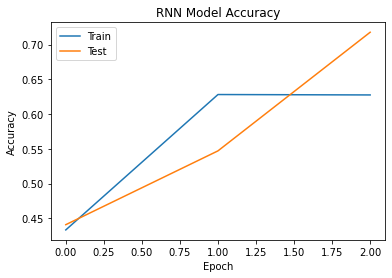

In [93]:
import matplotlib.pyplot as plt

# Plotting test accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

68/68 [==============================] - 1s 10ms/step


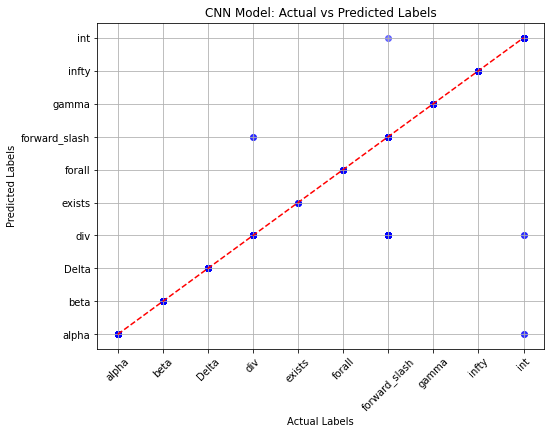

In [85]:
import matplotlib.pyplot as plt

# Generate predictions for test images using the CNN model
predictions_cnn = model.predict(test_images)

# Get the predicted labels from the CNN model
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(test_labels, predicted_labels_cnn, c='blue', alpha=0.5)
plt.plot([0, len(symbol_classes)-1], [0, len(symbol_classes)-1], c='red', linestyle='--')
plt.title('CNN Model: Actual vs Predicted Labels')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.xticks(range(len(symbol_classes)), symbol_classes, rotation=45)
plt.yticks(range(len(symbol_classes)), symbol_classes)
plt.grid(True)
plt.show()


68/68 [==============================] - 0s 3ms/step


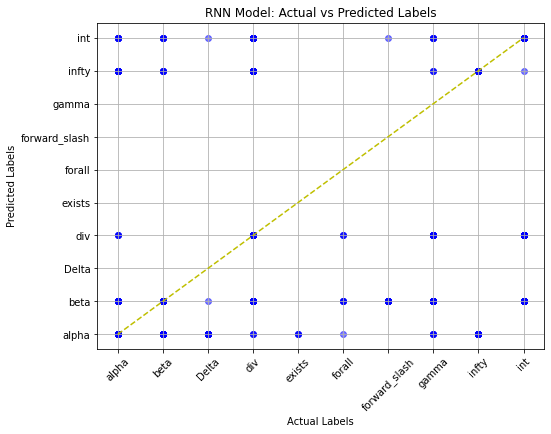

In [92]:
import matplotlib.pyplot as plt

# Generate predictions for test images using the CNN model
predictions_rnn = model.predict(Rtest_images)

# Get the predicted labels from the CNN model
predicted_labels_rnn = np.argmax(predictions_rnn, axis=1)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Rtest_labels, predicted_labels_rnn, c='blue', alpha=0.5)
plt.plot([0, len(symbol_classes)-1], [0, len(symbol_classes)-1], c='y', linestyle='--')
plt.title('RNN Model: Actual vs Predicted Labels')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.xticks(range(len(symbol_classes)), symbol_classes, rotation=45)
plt.yticks(range(len(symbol_classes)), symbol_classes)
plt.grid(True)
plt.show()
